## The Ishigami function

In this example we are going to quantify the correlation between the input variables and the output variable of a model thanks to the *Sobol'* indices.

The *Sobol'* indices allow to evaluate the importance of a single variable or a specific set of variables. 

*Sobol'* indices range is $\left[0; 1\right]$ ; the more the indice value is close to 1 the more the variable is important toward the output variance of the function. The *Sobol'* indices can be computed at different orders.

The first order indices evaluate the importance of one variable at a time ($d$ indices, with $d$ the input dimension of the model). The $d$ total indices give the relative importance of every variables except the variable $x_i$, for every variable.

Here the *Sobol'* indices are estimated on an analytical function: *Ishigami*. It writes

$$ F(\mathbf{x}) = \sin(x_1)+7\sin(x_2)^2+0.1x_3^4\sin(x_1), \quad \mathbf{x}\in [-\pi, \pi]^3 $$
Analytical values of *Sobol'* indices for this function are available:

\begin{align}
    S_{1, 2, 3} &= [0.314, 0.442, 0.], \\
    S_{T_{1, 2, 3}} &= [0.558, 0.442, 0.244].
\end{align}

This function is interesting because it exhibits an interaction between $x_1$ and $x_3$ although $x_3$ by itself do not play a role at first order.

In [1]:
import openturns as ot

ot.RandomGenerator.SetSeed(0)

# Create the model and input distribution
formula = ['sin(X1)+7*sin(X2)^2+0.1*X3^4*sin(X1)']
input_names = ['X1', 'X2', 'X3']
dimension = 3
corners = [[-np.pi] * dimension, [np.pi] * dimension]
model = ot.SymbolicFunction(input_names, formula)
distribution = ot.ComposedDistribution([ot.Uniform(corners[0][i], corners[1][i])
                                        for i in range(dimension)])

## *Sobol'* sensitivity indices

In [2]:
import numpy as np
from otsensitivity import sobol_saltelli, plot_indices

In [3]:
# Compute Sobol' indices using the Saltelli estimator

first_order, total_order = sobol_saltelli(model, 5000, 3, [[-np.pi, -np.pi, -np.pi],
                                                           [np.pi, np.pi, np.pi]])

true_sobol = [[0.314, 0.442, 0.], [0.558, 0.442, 0.244]]  # [first, total]

## first order indices
print(f"First order Sobol' indices: {first_order}\n"
      f"Relative error: {abs(np.array(first_order) - true_sobol[0]) * 100}%")  # maximum is 1

## total order indices
print(f"Total order Sobol' indices: {total_order}\n"
      f"Relative error: {abs(np.array(total_order) - true_sobol[1]) * 100}%")  # maximum is 1

First order Sobol' indices: [ 0.33160537  0.43608775 -0.01009645]
Relative error: [1.76053699 0.59122532 1.00964475]%
Total order Sobol' indices: [0.54601562 0.44339109 0.23940215]
Relative error: [1.19843753 0.1391089  0.45978473]%


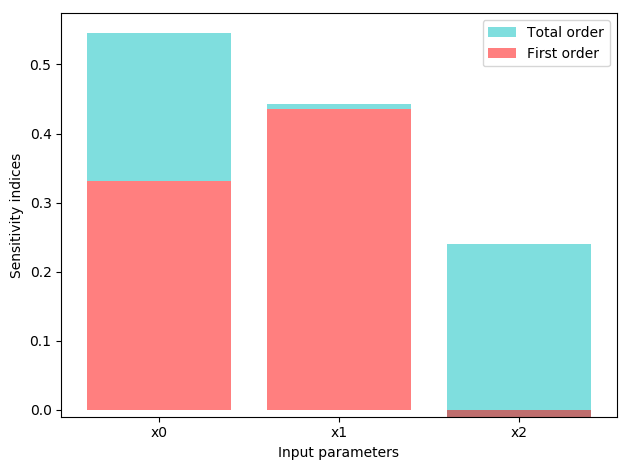

([<Figure size 640x480 with 1 Axes>],
 [<matplotlib.axes._subplots.AxesSubplot at 0x11cfccda0>])

In [4]:
plot_indices([first_order, total_order])

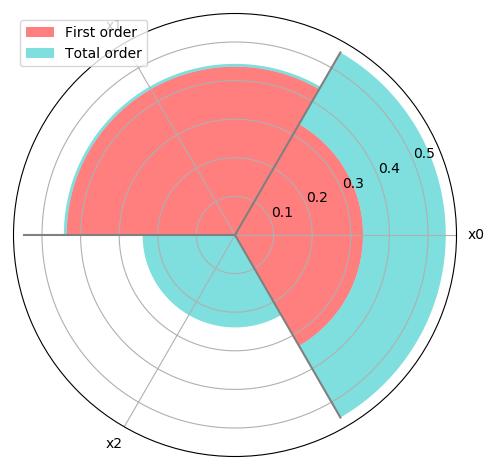

([<Figure size 640x480 with 1 Axes>],
 [<matplotlib.axes._subplots.PolarAxesSubplot at 0x11d0ce9b0>])

In [5]:
plot_indices([first_order, total_order], polar=True)